## Types of tokenization algorithms

In the simple tokenizer class in the `01_working_with_text.ipynb`, we performed **word level tokenizing** by breaking down the text into words and punctutations and numbers to generate a vocabulary. Any words that were not in the vocavulary (Out-of-Vocabulary) were replaced with an <|UNK|> token.

However, replacement with the <|UNK|> token is not the most ideal if the there are many OOV tokens and we start losing important contextual infromation.

One solution to this could be **character level tokenizing** - to tokenize each character (lower case and uppercase ), punctuations and numbers separately so that we do not encounter any unknown charcters. But this again ideal and computaitonally very expensive considering that the Vanilla transformer architecture's complexity increases at a magnitude of O(n^2) with respect to the input size. 


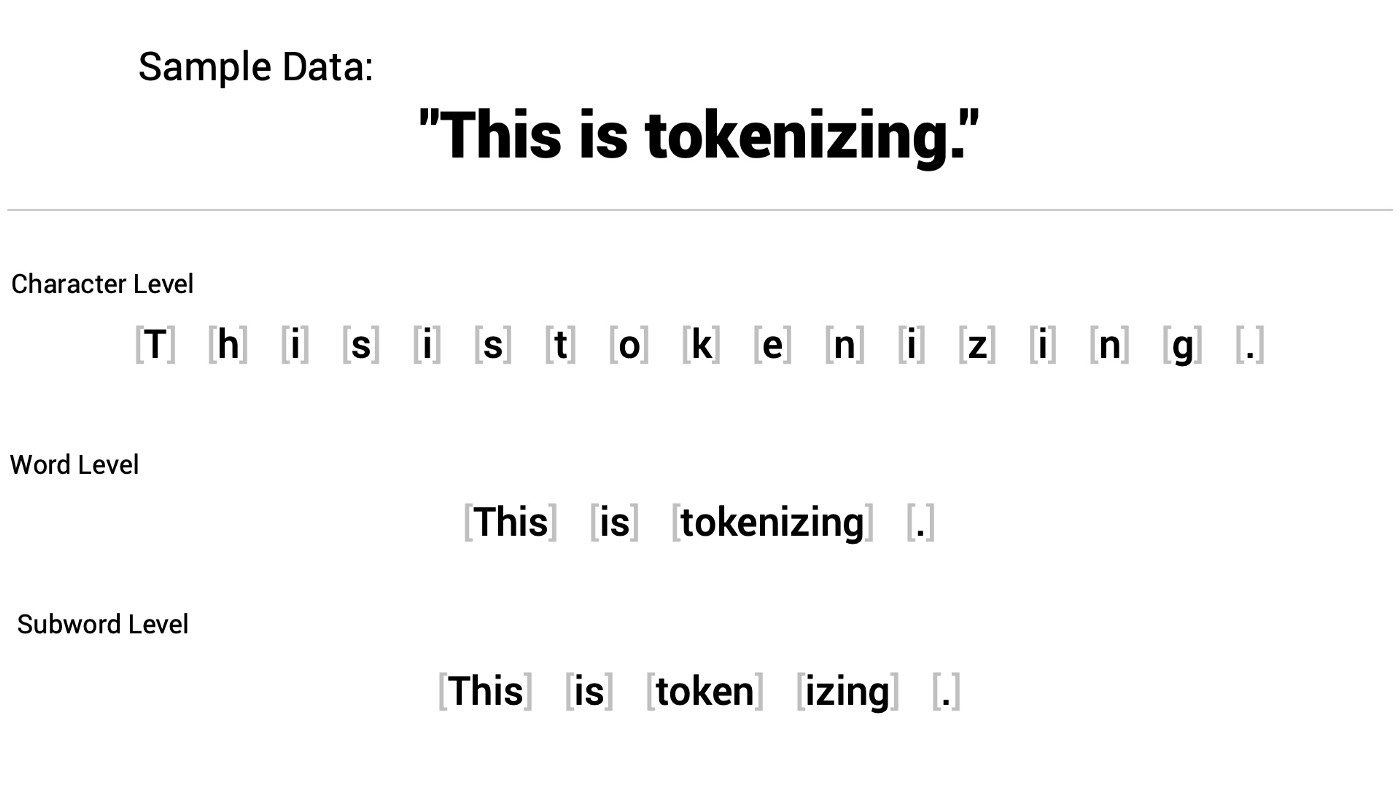

A more efficient solution is **Subword level tokenizing** that combines both the approaches, keeping high frequency words such as "it", "is", "the", etc. and breaking down bigger words into subwords.

Most language models use some form of subword tokenizing algorithms like Byte-Pair Encoding, SentencePience, WordPiece and Unigram. 

## Byte-Pair Encoding

Byte-Pair Encoding (BPE) are used in language models like GPT-2, RoBERTa, XLM, FlauBERT, etc. 

- `tiktoken` is a fast BPE tokeniser for use with OpenAI's models. tiktoken is between **3-6x faster** than a comparable open source tokeniser. Read more at https://github.com/openai/tiktoken

In [1]:
!pip install tiktoken

  Using cached regex-2024.9.11-cp310-cp310-win_amd64.whl.metadata (41 kB)
   ---------------------------------------- 0.0/884.2 kB ? eta -:--:--
   --------------------------------------- 884.2/884.2 kB 10.0 MB/s eta 0:00:00
Using cached regex-2024.9.11-cp310-cp310-win_amd64.whl (274 kB)


In [2]:
import tiktoken

In [3]:
tokenizer = tiktoken.get_encoding("gpt2")

In [11]:
text = ("How many r's are there in strawberry? <|EOS|>"
        "There are two r's in strawberry!")
token_ids = tokenizer.encode(text)
print(token_ids)

[2437, 867, 374, 338, 389, 612, 287, 41236, 30, 1279, 91, 36, 2640, 91, 29, 1858, 389, 734, 374, 338, 287, 41236, 0]


In [12]:
print(tokenizer.decode(token_ids))

How many r's are there in strawberry? <|EOS|>There are two r's in strawberry!


## Encoding with sliding window

We will use A Tale of Two Cities by Charles Dickens from the Gutenberg Project:

In [14]:
import requests
url = "http://www.gutenberg.org/files/98/98-0.txt"

response = requests.get(url)
text = response.text

In [17]:
encoded_text = tokenizer.encode(text)
print(len(encoded_text))

228249
